In [1]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
from pandas import read_csv, DataFrame
import seaborn as sns
#sns.set_palettse('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
#import plotly.express as px
#import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Присвоим переменной «url» ссылку на датасет:

#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'

# создаем лист с названием столбцов:

#cols = ['sepal-lenght','sepal-width','petal-lenght','petal-width','class']

# используем Pandas read_csv():

#dataset = read_csv('E:/git/Data-Analysis101/datasets/marketing/marketing_campaign.csv', sep="\t")

df = read_csv('E:/git/Data-Analysis101/datasets/marketing/marketing_campaign.csv', sep="\t")


#dataset = pd.read_csv(url, names = cols)

In [4]:
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# Remove unnecessary columns 
df.drop(["ID","Z_CostContact","Z_Revenue"],axis=1,inplace=True)

In [6]:
# Drop the null values
df=df.dropna()

In [7]:

df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format="%d-%m-%Y")
latest_date = df['Dt_Customer'].max()
df['Days_of_client'] = (latest_date - df['Dt_Customer']).dt.days

df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_of_client
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,4,7,0,0,0,0,0,0,1,663
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,5,0,0,0,0,0,0,0,113
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,312
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,4,6,0,0,0,0,0,0,0,139
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,161


# Сократим кол-во фич, объединением по смыслу

In [8]:
df['Education'] = df['Education'].replace(['PhD', '2n Cycle', 'Graduation', 'Master'], 'PG')
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [9]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [10]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [41]:

df = df[['Education', 'Marital_Status', 'Income',  'Expenses', 'TotalNumPurchases', 
 'Complain', 'Response']]

In [42]:
cols_for_clusters = ['Education', 'Marital_Status', 'Income', 'Expenses', 'TotalNumPurchases', 'Complain', 'Response']

In [43]:
cat_df = list(df.select_dtypes(include=["object"]).columns)

print(cat_df)

[]


# Закодируем категориальные

In [44]:
LE = LabelEncoder()
for col in df:
    if df[col].dtype == 'object':
        df[col] = LE.fit_transform(df[col])

In [45]:
ds = df.copy()
cols_del = ['Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )


In [46]:
#scaled_ds.head()

In [68]:
X = scaled_ds

In [49]:
X.head()

,Education,Marital_Status,Income,Expenses,TotalNumPurchases
0,-0.158041,-1.348829,0.234063,1.675488,1.319446
1,-0.158041,-1.348829,-0.234559,-0.962358,-1.157987
2,-0.158041,0.741384,0.769478,0.280250,0.797881
3,-0.158041,0.741384,-1.017239,-0.919224,-0.897205
4,-0.158041,0.741384,0.240221,-0.307044,0.537099


In [50]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import plotly.graph_objects as go



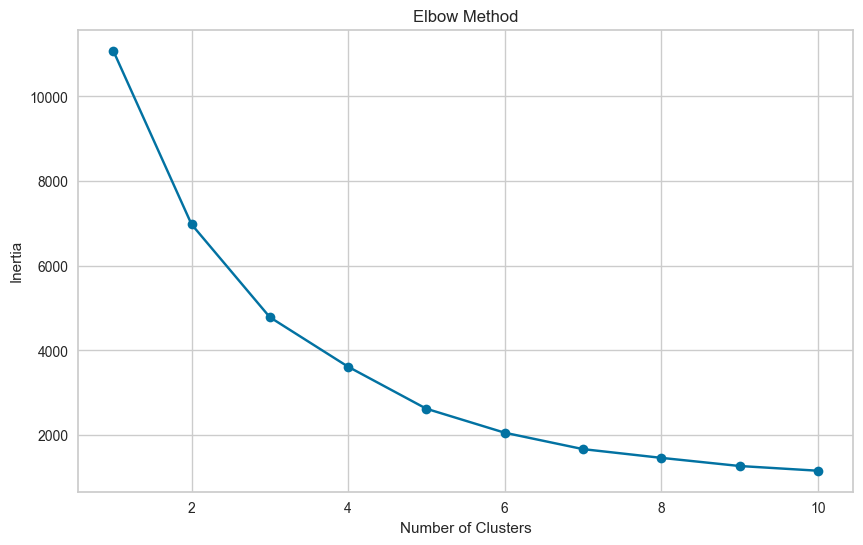

In [51]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X[['Education', 'Marital_Status', 'Income', 'Expenses', 'TotalNumPurchases']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [69]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
#y = kmeans.fit_predict(X[['Education', 'Income','Kids','Expenses']])
# y = kmeans.fit_predict(X[['TotalNumPurchases', 'Income','Kids','Expenses']])
# y1 = kmeans.fit_predict(X[['TotalNumPurchases', 'Income','Kids','Expenses']])

y = kmeans.fit_predict(X[[
'Education', 'Marital_Status', 'Income', 'Expenses', 'TotalNumPurchases']])

y1 = kmeans.fit_predict(
X[[
'Education', 'Marital_Status', 'Income', 'Expenses', 'TotalNumPurchases']])

In [70]:
#X['Cluster'] = kmeans.fit_predict(X[['Education', 'Income','Kids','Expenses']])
#X['Cluster'] = kmeans.fit_predict(X[['TotalNumPurchases', 'Income','Kids','Expenses']])

X['Cluster'] = kmeans.fit_predict(X[['Education', 'Marital_Status', 'Income','Expenses', 'TotalNumPurchases']])

In [71]:
X.Cluster.unique()

array([1, 0, 3, 2, 4, 5])

In [72]:
n_clusters = np.arange(2, 21)

In [73]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n




In [74]:
best_metric

[2,
 0.3717973064333036,
 0.4761960911150835,
 array([[-0.15160029,  0.0377276 ,  0.74228699,  0.91801977,  0.88334146,
          2.31678252],
        [ 0.12627088, -0.03142406, -0.61826551, -0.76463682, -0.73575256,
          1.41356493]])]

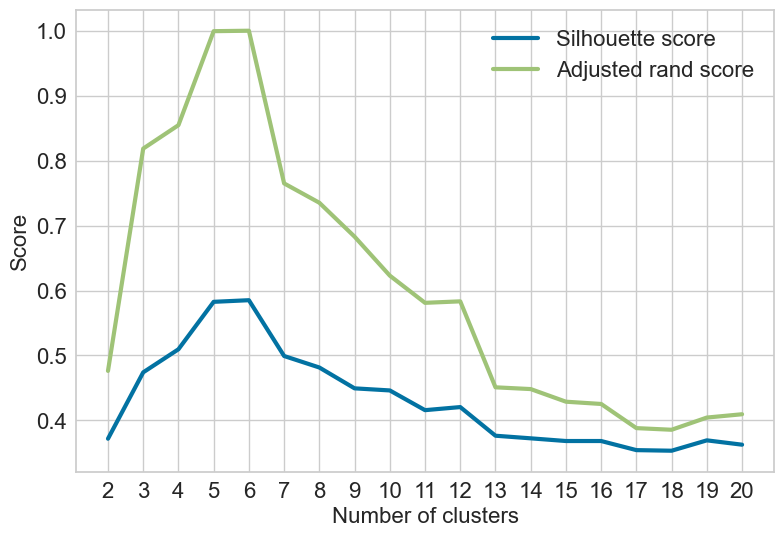

In [75]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()


#plt.figure(figsize=(9, 6))
#plt.plot(n_clusters, within_cluster_dist_values, linewidth=3, label='Within-cluster distance')
#plt.xlabel('Number of clusters', size=16)
#plt.ylabel('Score', size=16)
#plt.xticks(n_clusters, size=16)
#plt.yticks(size=16)
#plt.legend(loc='best', fontsize=16)

#plt.show()

In [76]:
#Цвета кластеров
cmap = plt.get_cmap('Set1') 


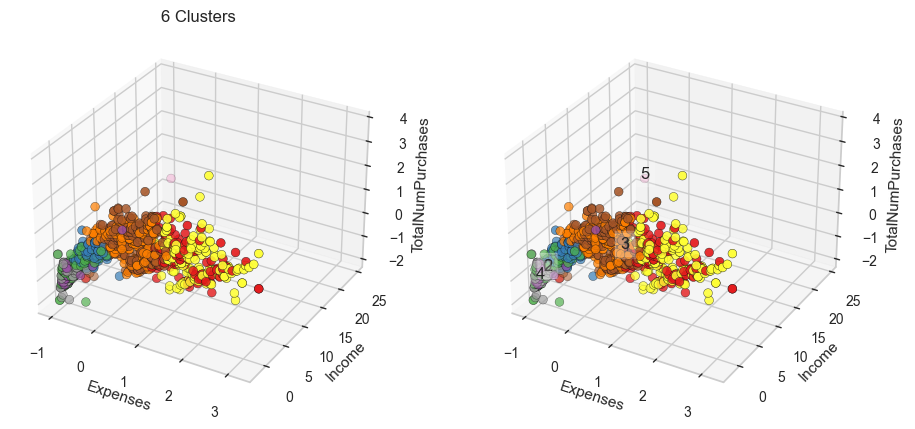

In [79]:
#A 3D Projection Of Data In The Reduced Dimension
x =X["Expenses"]
y =X["Income"]
z =X["TotalNumPurchases"]

est=KMeans(n_clusters=9, random_state=42, n_init=10).fit(X)
labels = est.labels_
#To plot
fig = plt.figure(figsize=(11,11))

ax = fig.add_subplot(2, 2,1, projection="3d")
ax.scatter(x,y,z, s=40, c=labels.astype(float), edgecolor="k", cmap=cmap, marker="o" )
ax.set_title("6 Clusters")
    
ax.set_xlabel("Expenses")
ax.set_ylabel("Income")
ax.set_zlabel("TotalNumPurchases")


# Plot the ground truth
ax = fig.add_subplot(2, 2, 2, projection="3d")

for name, label in [(0, 0), (1, 1), (2, 2),(3, 3),(4, 4),(5, 5)]:
    ds = X[X["Cluster"]==name]
    ax.text3D(
        ds["Expenses"].mean(),
        ds["Income"].mean(),
        ds["TotalNumPurchases"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),)

ax.set_xlabel("Expenses")
ax.set_ylabel("Income")
ax.set_zlabel("TotalNumPurchases")

ax.scatter(x, y, z, s=40, c=est.labels_.astype(float), edgecolor="k",cmap=cmap)
plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [78]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y1, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.45
Adjusted Rand Index: 0.68


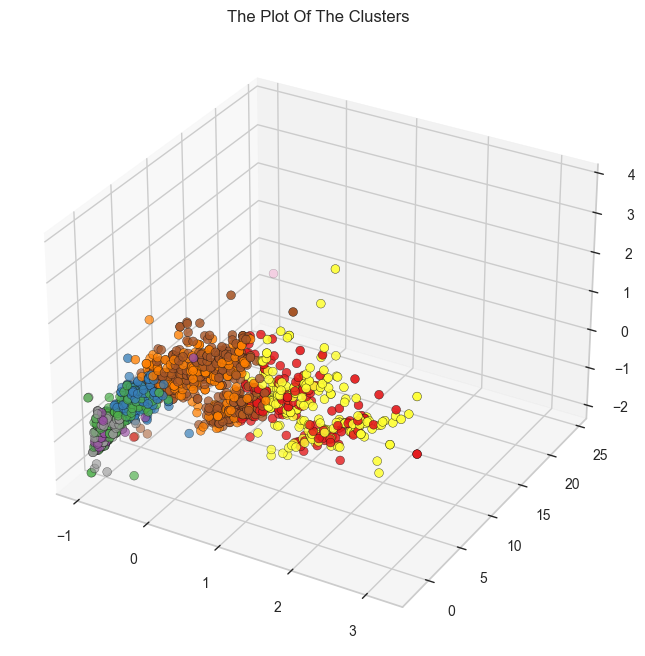

In [80]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=labels.astype(float),edgecolor="k",cmap=cmap, marker='o' )
ax.set_title("The Plot Of The Clusters")
plt.show()

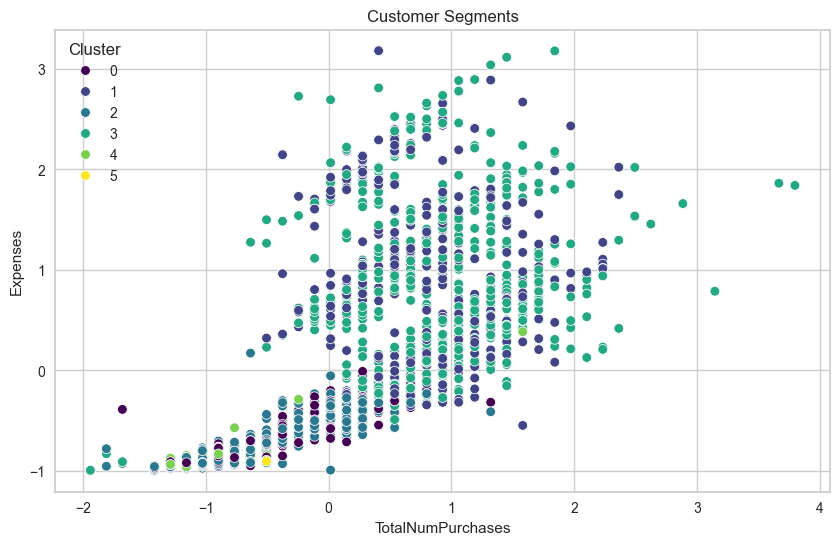

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='TotalNumPurchases', y='Expenses', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()

In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram

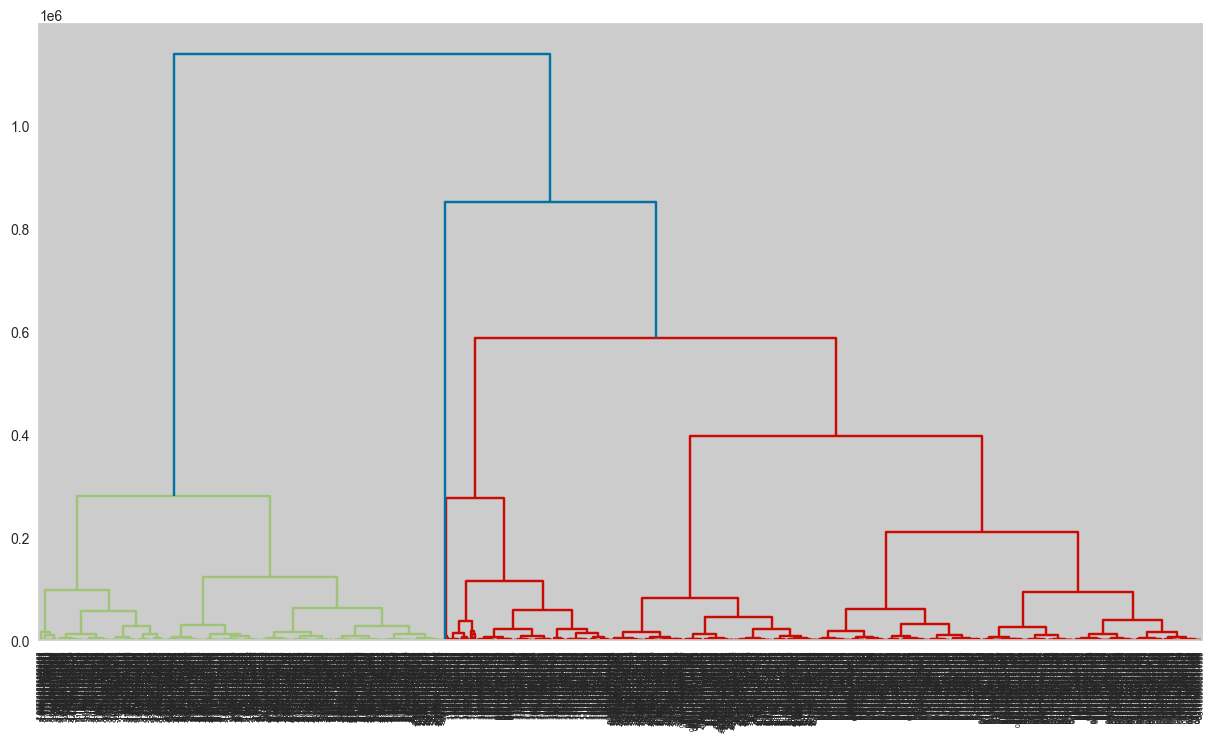

In [67]:
samples = df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')
# попробуйте с другими методами
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

In [35]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [36]:
mins = X.shape[1]

In [37]:
n_clusters_

NameError: name 'n_clusters_' is not defined

['y', 'b', 'g', 'r']


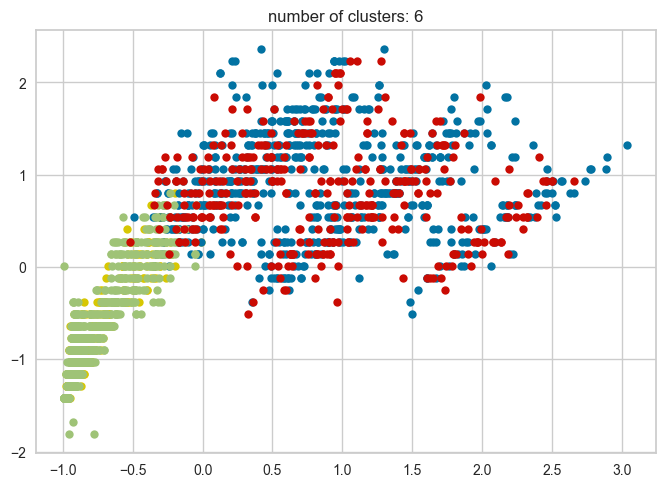

In [82]:
db = DBSCAN(eps=0.5, min_samples=12).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["Expenses"], xy["TotalNumPurchases"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["Expenses"], xy["TotalNumPurchases"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


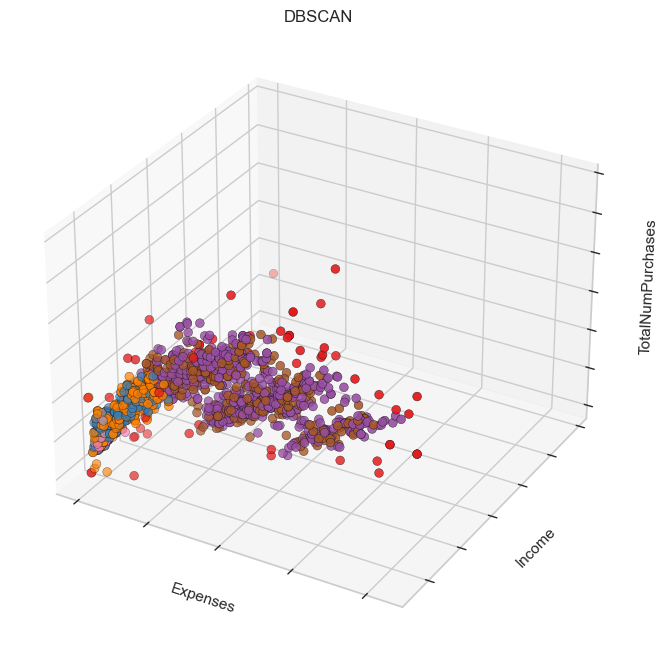

In [84]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1,projection="3d")

ax.scatter(X["Expenses"], X["Income"], X["TotalNumPurchases"], s=40, c=labels.astype(float),cmap=cmap, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Expenses")
ax.set_ylabel("Income")
ax.set_zlabel("TotalNumPurchases")
ax.set_title("DBSCAN")

plt.show()

In [85]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.57
Adjusted Rand Index: 0.00
